# 2. Double Deep Q-Learning for Navigation
---

In this notebook I will give a second solution the [Unity ML Banana-Collector environment](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Learning-Environment-Examples.md#banana-collector), using [Doube Deep Q-Learning](https://arxiv.org/pdf/1509.06461.pdf). See the [README](https://github.com/bobflagg/Deep-Q-Learning-for-Navigation/blob/master/README.md) for instructions on how to setup your environment to run the code here.  

This solution requires only a minor tweak to the learn method of the [DQN-Agent](https://github.com/bobflagg/Deep-Q-Learning-for-Navigation/blob/master/dqn_agent.py) so I'll subclass the Agent class and override the learn method below.  

In [1]:
%%time

from dqn_agent import Agent, TAU
import torch.nn.functional as F
from trainer import train
from unityagents import UnityEnvironment

class DoubleQAgent(Agent):
    
    def learn(self, experiences, gamma):
        """Update value parameters using given batch of experience tuples.

        Params
        ======
            experiences (Tuple[torch.Tensor]): tuple of (s, a, r, s', done) tuples 
            gamma (float): discount factor
        """
        states, actions, rewards, next_states, dones = experiences

        # Get predicted actions for next states from local model
        next_actions = self.qnetwork_local(next_states).detach().argmax(1).unsqueeze(1)
        Q_targets_next = self.qnetwork_target(next_states).gather(1, next_actions)

        # Compute Q targets for current states 
        Q_targets = rewards + (gamma * Q_targets_next * (1 - dones))

        # Get expected Q values from local model
        Q_expected = self.qnetwork_local(states).gather(1, actions)


        # Get expected Q values from local model
        Q_expected = self.qnetwork_local(states).gather(1, actions)

        # Compute loss
        loss = F.mse_loss(Q_expected, Q_targets)
        # Minimize the loss
        self.optimizer.zero_grad()
        loss.backward()
        self.optimizer.step()

        # ------------------- update target network ------------------- #
        self.soft_update(self.qnetwork_local, self.qnetwork_target, TAU)                     

env = UnityEnvironment(file_name="./data/Banana.app")
agent = DoubleQAgent(state_size=37, action_size=4, seed=0)
scores = train(env, agent)

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Episode 100	Average Score: 0.22
Episode 200	Average Score: 2.78
Episode 300	Average Score: 7.06
Episode 400	Average Score: 10.27
Episode 500	Average Score: 12.60
Episode 527	Average Score: 13.00
Environment solved in 427 episodes!	Average Score: 13.00


<Figure size 640x480 with 1 Axes>

CPU times: user 3min 45s, sys: 23.8 s, total: 4min 8s
Wall time: 7min 53s


Again the [Unity ML Banana-Collector environment](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Learning-Environment-Examples.md#banana-collector) was solved in under 500 episodes. I'm not really seeing an improvement over simple Deep Q-Learning.  Maybe this environment is too simple to demonstrate that?  Let's look at a plot of the scores.

Text(0.5, 0, 'Episode #')

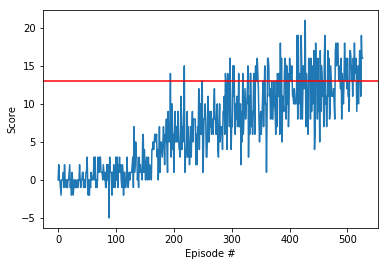

In [2]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.axhline(y=13, color='r', linestyle='-')
plt.ylabel('Score')
plt.xlabel('Episode #')

There does seem to be less variance in this plot so maybe Double Deep Q-Learning is doing better than vanilla Deep Q-Learning on this task, after all.